# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Fina Noviantika
- **Email:** finanoviantika73@gmail.com
- **ID Dicoding:** finanoviantika

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1: Bagaimana hubungan antara waktu pengiriman dengan review score yang diberikan pelanggan?
- Pertanyaan 2: Berasal dari state manakah pelanggan dan revenue terbanyak?
- Pertanyaan 3: Metode pembayaran mana yang paling sering digunakan dan paling banyak menghasilkan revenue?
- Pertanyaan 4: Bagaimana segmentasi pelanggan berdasarkan frekuensi dan total nilai pembelian mereka?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

### Tabel Orders

In [2]:
orders_df = pd.read_csv('orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**Insight:**
- Tabel file orders memiliki 8 kolom yaitu order_id, customer_id, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date.

### Tabel Reviews

In [3]:
reviews_df = pd.read_csv('order_reviews_dataset.csv')
reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


**Insight:**
- Tabel file reviews memiliki 7 kolom yaitu review_id, order_id, review_score, review_comment_title, review_comment_message, review_creation_date, dan review_answer_timestamp.

### Tabel Customers

In [4]:
customers_df = pd.read_csv('customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**Insight:**
- Tabel file customers memiliki 5 kolom yaitu customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, dan customer_state.

### Tabel Payments

In [5]:
payments_df = pd.read_csv('order_payments_dataset.csv')
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


**Insight:**
- Tabel file payments memiliki 5 kolom yaitu order_id, payment_sequential, payment_type, payment_installments, dan payment_value.

### Assessing Data

### Menilai data orders_df

In [6]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


**Insight:**
- Total data yaitu 99441 data.
- Semua kolom waktu masih bertipe object yaitu order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, dan order_estimated_delivery_date.
- Terdapat kolom yang memiliki nilai NaN yaitu order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date.

In [7]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


**Insight:**
- Kolom order_approved_at	memiliki 160 nilai NaN.
- Kolom order_delivered_carrier_date memiliki 1783 nilai NaN.
- Kolom order_delivered_customer_date	memiliki 2965 nilai NaN.

In [8]:
print("Jumlah duplikasi: ", orders_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ada duplikasi

In [9]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:06:07,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-14 20:02:44,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
- Terdapat 8 jenis order_status dan yang paling sering muncul ialah "delivered" sebanyak 96.478 order.
- Terdapat 98.875 nilai unik dari 99.441 order_purchase_timestamp, artinya ada sebanyak 566 waktu pembelian yang terjadi secara bersamaan.
- Terdapat 90.733 waktu persetujuan unik dari 99.281 data, kemungkinan approval dilakukan secara batch sehingga ada persetujuan yang sama.
- Terdapat 81.018 nilai unik dari 97.658 data, menunjukkan banyak seller mengirim ke kurir diwaktu yang sama atau sangat berdekatan (bisa jadi pengiriman per batch).
- Terdapat 95.664 nilai unik dari 96.476 data, menunjukkan sebagian kecil pelanggan menerima barang diwaktu yang sama (bisa jadi karena lokasi yang sama dan diantar kurir yang sama).
- Terdapat 459 nilai unik dari 99.441 data, menunjukkan estimasi pengiriman memiliki variasi yang sangat terbatas (bisa jadi hanya tergantung pada lokasi dan jenis pengiriman).

### Menilai data reviews_df

In [10]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


**Insight:**
- Total data yaitu 99.224 data.
- Kolom review_score tidak memiliki nilai NaN, artinya semua review memiliki skor.
- Terdapat kolom yang memiliki nilai NaN yaitu review_comment_title dan review_comment_message. Kedua kolom ini tidak digunakan jadi nanti akan dihapus.

In [11]:
reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


**Insight**:
- Kolom review_comment_title memiliki 87.656 nilai NaN.
- Kolom review_comment_message memiliki 58.247 nilai NaN.
- Kedua kolom ini nanti akan dihapus karena tidak akan digunakan.

In [12]:
print("Jumlah duplikasi: ", reviews_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight**:
- Tidak ada duplikasi

In [13]:
reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


Insight:
- Tidak ada keanehan nilai pada review_score. Masuk akal dengan minimum 1 dan maksimum 5.

### Menilai data customers_df

In [14]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


**Insight**:
- Terdapat total 99.441 data.
- Semua kolom tidak memiliki nilai NaN.

In [15]:
print("Jumlah duplikasi: ", customers_df.duplicated().sum())

Jumlah duplikasi:  0


**Insight**:
- Tidak ada duplikasi.

In [16]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


**Insight**:
- Tidak ada keanehan nilai pada customers_df.

### Menilai data payments_df

In [17]:
payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Insight:
- Terdapat total 103.886 data.
- Semua kolom tidak memiliki nilai NaN.

In [18]:
print("Jumlah duplikasi: ", payments_df.duplicated().sum())

Jumlah duplikasi:  0


Insight:
- Tidak ada duplikasi.

In [19]:
payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Insight:
- Kolom payment_installments dan payment_value memiliki minimum 0, bisa jadi ini data error atau transaksi tidak valid. Nantinya perlu dihapus.

### Cleaning Data

### Membersihkan data orders_df

In [20]:
orders_df.dropna(subset=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

In [21]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,0
order_delivered_carrier_date,0
order_delivered_customer_date,0
order_estimated_delivery_date,0


**Insight:**
- Semua kolom sudah tidak memiliki nilai NaN.

In [22]:
datetime_columns = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [23]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


**Insight**:
- Kolom waktu sudah diubah menjadi format datetime.

### Membersihkan data reviews_df

In [24]:
reviews_df.drop(columns=['review_comment_title', 'review_comment_message'], inplace=True)

In [25]:
reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_creation_date,0
review_answer_timestamp,0


Insight:
- Semua kolom sudah tidak memiliki nilai NaN.
- Kolom review_comment_title dan review_comment_message dihapus karena tidak akan digunakan pada proyek ini.

### Membersihkan data customers_df

In [26]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Insight:
- Data customers_df sudah bersih dan tidak ada keanehan pada datanya sehingga tidak diperlukan proses pembersihan.

### Membersihkan data payments_df

In [27]:
# Cek jumlah data yang akan dihapus
payments_df[(payments_df['payment_value'] == 0) | (payments_df['payment_installments'] == 0)].shape

(11, 5)

In [28]:
# menghapus data payment_value dan payment_installments yang bernilai 0
payments_df = payments_df[(payments_df['payment_value'] > 0) & (payments_df['payment_installments'] > 0)]

In [29]:
payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103875,103875.000000,103875,103875.000000,103875.000000
unique,99435,NaN,4,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,27,NaN,76793,NaN,NaN
mean,NaN,1.092323,NaN,2.853564,154.114883
std,NaN,0.704308,NaN,2.687108,217.500635
min,NaN,1.000000,NaN,1.000000,0.010000
25%,NaN,1.000000,NaN,1.000000,56.815000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.840000


Insight:
- payment_installments memiliki minimum 1 dan maksimum 24.
- payment_value memiliki minimum 0.01 dan maksimum 13664.08.
- Kedua kolom ini sudah memiliki nilai yang logis.

## Exploratory Data Analysis (EDA)

### Explore data orders_df

In [30]:
# hitung lama pengiriman product dalam hari
orders_df["delivery_duration"] = (orders_df["order_delivered_customer_date"] - orders_df["order_purchase_timestamp"]).dt.days

In [31]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,2


In [32]:
orders_df.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,12.093582
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,0.000000
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,6.000000
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,15.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,209.000000


In [33]:
# cek frekuensi delivery duration bernilai 0 hari
orders_df[orders_df['delivery_duration'] == 0].shape

(13, 9)

In [34]:
# cek waktu pengiriman diatas 60 hari
orders_df[orders_df['delivery_duration'] > 60].sort_values(by='delivery_duration', ascending=False)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration
19590,ca07593549f1816d26a572e06dc1eab6,75683a92331068e2d281b11a7866ba44,delivered,2017-02-21 23:31:27,2017-02-23 02:35:15,2017-03-08 13:47:46,2017-09-19 14:36:39,2017-03-22,209
55619,1b3190b2dfa9d789e1f14c05b647a14a,d306426abe5fca15e54b645e4462dc7b,delivered,2018-02-23 14:57:35,2018-02-23 15:16:14,2018-02-26 18:49:07,2018-09-19 23:24:07,2018-03-15,208
61610,440d0d17af552815d15a9e41abe49359,7815125148cfa1e8c7fee1ff7974f16c,delivered,2017-03-07 23:59:51,2017-03-09 01:11:33,2017-03-15 13:00:08,2017-09-19 15:12:50,2017-04-07,195
89130,285ab9426d6982034523a855f55a885e,9cf2c3fa2632cee748e1a59ca9d09b21,delivered,2017-03-08 22:47:40,2017-03-08 22:47:40,2017-03-09 08:53:20,2017-09-19 14:00:04,2017-04-06,194
70307,2fb597c2f772eca01b1f5c561bf6cc7b,217906bc11a32c1e470eb7e08584894b,delivered,2017-03-08 18:09:02,2017-03-08 18:09:02,2017-03-13 08:54:02,2017-09-19 14:33:17,2017-04-17,194
...,...,...,...,...,...,...,...,...,...
30140,b73c273d02a8045c60df03ae7c03dc4b,7aea4c1a850cf1f179099fa1c85e9c51,delivered,2017-07-05 22:24:44,2017-07-06 03:30:13,2017-07-06 14:27:36,2017-09-05 15:51:55,2017-08-08,61
29373,6325af88a0611fc357055cb87dcec11e,bfc24858928300e9b18e0d96637b8404,delivered,2018-07-18 13:40:31,2018-07-19 02:43:07,2018-07-25 15:27:00,2018-09-17 13:48:28,2018-08-21,61
25922,6bf14ce96e0c6026fe21f80a498bb446,82ccacbefc4bf6143a989f42785134b4,delivered,2017-11-24 14:18:01,2017-11-24 16:32:20,2017-11-27 13:07:24,2018-01-24 14:43:28,2017-12-27,61
86461,a767f123fcb9ebe4eea953349dfd5a81,e8945aceed698580f92f6d9e4ecaf34e,delivered,2018-04-05 07:53:47,2018-04-05 08:10:08,2018-04-18 01:52:38,2018-06-05 18:11:00,2018-05-04,61


In [35]:
orders_df_clean = orders_df.copy()
orders_df_clean.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration
count,96461,96461,96461,96461,96461,96461,96461,96461,96461.000000
unique,96461,96461,2,NaN,NaN,NaN,NaN,NaN,NaN
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,1,96455,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,2018-01-01 23:53:26.642249216,2018-01-02 10:10:06.480142336,2018-01-05 05:21:04.508827392,2018-01-14 13:17:13.228102400,2018-01-25 17:33:14.236012544,12.093582
min,NaN,NaN,NaN,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-10-04 00:00:00,0.000000
25%,NaN,NaN,NaN,2017-09-14 09:28:28,2017-09-14 14:30:14,2017-09-18 16:52:19,2017-09-25 22:31:59,2017-10-05 00:00:00,6.000000
50%,NaN,NaN,NaN,2018-01-20 19:59:42,2018-01-22 13:49:00,2018-01-24 16:19:03,2018-02-02 19:50:56,2018-02-16 00:00:00,10.000000
75%,NaN,NaN,NaN,2018-05-05 18:33:24,2018-05-06 10:30:49,2018-05-08 14:33:00,2018-05-15 23:08:54,2018-05-28 00:00:00,15.000000
max,NaN,NaN,NaN,2018-08-29 15:00:37,2018-08-29 15:10:26,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-10-25 00:00:00,209.000000


**Insight:**
- Dari proses perhitungan waktu pengiriman dalam hari untuk setiap order_id didapatkan bahwa minimum pengiriman 0 hari (kemungkinan dikirim dihari yang sama) dan maksimum 209 hari (kemungkinan lokasi sangat jauh) dengan rata-rata waktu pengiriman sebesar 12 hari.
- Nantinya kita akan melihat bagaimana hubungan waktu pengiriman dengan hasil review score dari para pelanggan.

### Explore data reviews_df

In [36]:
reviews_df["review_score"].value_counts()

,count
review_score,
5,57328
4,19142
1,11424
3,8179
2,3151


In [37]:
reviews_df.sort_values(by='review_score', ascending=False)

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22 00:00:00,2018-03-23 09:10:43
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09 00:00:00,2017-12-11 20:06:42
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21 00:00:00,2017-04-21 22:02:06
...,...,...,...,...,...
57329,96ec32719edab5fd4f9cb4d83f7442d5,a63e4b82c362c488802abe5a133440aa,1,2017-08-12 00:00:00,2017-08-13 04:40:07
19,373cbeecea8286a2b66c97b1b157ec46,583174fbe37d3d5f0d6661be3aad1786,1,2018-08-15 00:00:00,2018-08-15 04:10:37
99223,efe49f1d6f951dd88b51e6ccd4cc548f,90531360ecb1eec2a1fbb265a0db0508,1,2017-07-03 00:00:00,2017-07-03 21:01:49
39,9fd59cd04b42f600df9f25e54082a8d1,3c314f50bc654f3c4e317b055681dff9,1,2017-04-21 00:00:00,2017-04-23 05:37:03


Insight:
- review score 5 memiliki sebanyak 57328 data.
- review score 4 memiliki sebanyak 19142 data.
- review score 1 memiliki sebanyak 11424 data.
- review score 3 memiliki sebanyak 8179 data.
- review score 2 memiliki sebanyak 3151 data.

Terlihat bahwa sebanyak 22,93% masih tergolong bad reviews yaitu score 1, 2, dan 3. Namun, good reviews memiliki nilai yang lebih tinggi yaitu 77,06% dari score 4 dan 5.

### Explore data customers_df

In [38]:
customers_df["customer_state"].value_counts()

,count
customer_state,
SP,41746
RJ,12852
MG,11635
RS,5466
PR,5045
SC,3637
BA,3380
DF,2140
ES,2033


Insight:
- Dari hasil diatas terlihat bahwa top-5 state sebagai penyumbang pelanggan tertinggi yaitu SP memiliki 41746 pelanggan, RJ	memiliki 12852 pelanggan, MG memiliki 11635 pelanggan, RS	memiliki 5466 pelanggan, dan PR	memiliki 5045 pelanggan.
- Selain itu, pelanggan pun berasal dari berbagai state lainnya.

### Exploratory data payments_df

In [39]:
payments_df["payment_type"].value_counts()

,count
payment_type,
credit_card,76793
boleto,19784
voucher,5769
debit_card,1529


In [40]:
# Filter pembayaran menggunakan credit card
credit_card_payments = payments_df[payments_df['payment_type'] == 'credit_card']

# Mengecek pembayaran tertinggi menggunakan credit card
highest_credit_card_payment = credit_card_payments['payment_value'].max()

print(f"Nilai pembayaran tertinggi untuk credit card adalah: {highest_credit_card_payment}")

Nilai pembayaran tertinggi untuk credit card adalah: 13664.08


Insight:
- Dari hasi diatas terlihat bahwa payment_type yang digunakan pengguna paling tinggi yaitu credit card sebanyak 76793, boleto sebanyak 19784, voucher sebanyak 5769, dan debit_card 1529.
- Selain itu, payment_value paling tinggi yang menggunakan credit card ialah 13664.08.


## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana hubungan antara waktu pengiriman dengan review score yang diberikan pelanggan?

In [41]:
# gabungkan data
orders_reviews_df = pd.merge(orders_df_clean, reviews_df, on='order_id')

In [42]:
# Hitung rata-rata review_score untuk setiap delivery_duration
avg_review_by_duration = orders_reviews_df.groupby('delivery_duration')['review_score'].mean().reset_index()

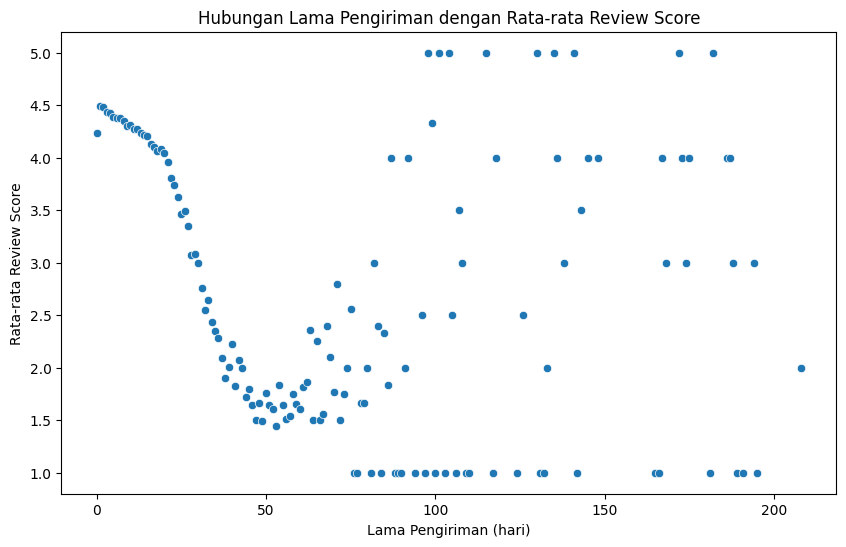

In [43]:
# visualisasi
plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_review_by_duration, x='delivery_duration', y='review_score')
plt.xlabel('Lama Pengiriman (hari)')
plt.ylabel('Rata-rata Review Score')
plt.title('Hubungan Lama Pengiriman dengan Rata-rata Review Score')
plt.show()

**Insight:**
- Dari hasil diatas, dapat dilihat bahwa review score yang diberikan pelanggan cukup bervariasi. Di waktu pengiriman dari 0-50 hari mengalami penurunan, dimana bisa jadi ini karena adanya keterlambatan pengiriman. Namun, untuk review score paling tinggi yaitu 5, justru memiliki waktu pengiriman yang lebih dari 50 hari, dimana ini bisa jadi pelanggan berada dilokasi jauh dan product sampai dengan aman tanpa kerusakan.
- Secara keseluruhan, hasil ini menunjukkan nilai yang negatif dimana banyak pelanggan lebih puas jika pengiriman bisa dilakukan secara cepat.

### Pertanyaan 2: Berasal dari state manakah pelanggan dan revenue terbanyak?

In [44]:
# menggabungkan data orders dan payments by order_id
orders_payments_df = pd.merge(orders_df_clean, payments_df, on='order_id')

In [45]:
# menggabungkan customers dan orders_payments by customer_id
customers_orders_payments_df = pd.merge(orders_payments_df, customers_df, on='customer_id')

/tmp/ipython-input-1435676086.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities_customers, x='customer_unique_id', y='customer_state', palette='viridis')


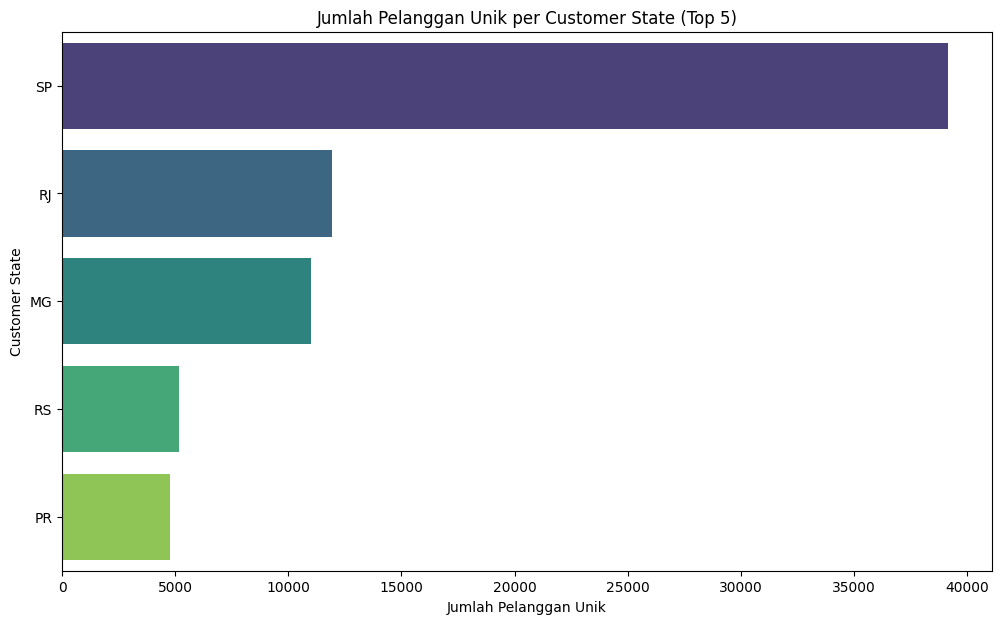

In [46]:
# Hitung jumlah pelanggan unik per kota
city_customer_counts = customers_orders_payments_df.groupby('customer_state')['customer_unique_id'].nunique().reset_index()

# Urutkan berdasarkan jumlah pelanggan dan tampilkan top 5 kota
top_cities_customers = city_customer_counts.sort_values(by='customer_unique_id', ascending=False).head(5)

# Visualisasikan jumlah pelanggan per kota
plt.figure(figsize=(12, 7))
sns.barplot(data=top_cities_customers, x='customer_unique_id', y='customer_state', palette='viridis')
plt.title('Jumlah Pelanggan Unik per Customer State (Top 5)')
plt.xlabel('Jumlah Pelanggan Unik')
plt.ylabel('Customer State')
plt.show()

/tmp/ipython-input-4074695185.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_cities_revenue, x='payment_value', y='customer_state', palette='viridis')


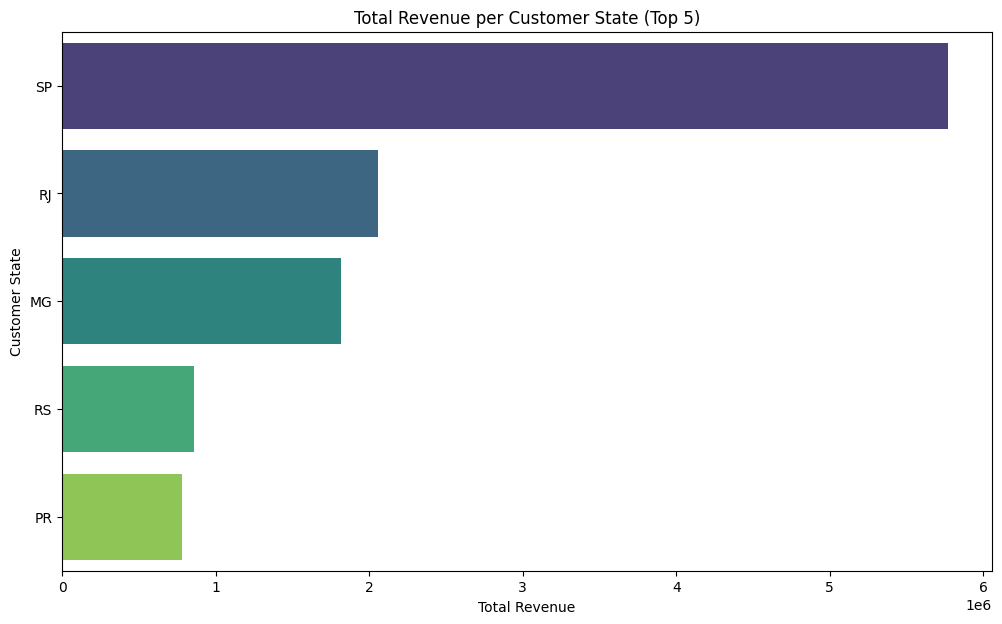

In [47]:
# Hitung total nilai pembelian untuk setiap kota
city_revenue = customers_orders_payments_df.groupby('customer_state')['payment_value'].sum().reset_index()

# Urutkan berdasarkan total revenue dan tampilkan top-5 kota
top_cities_revenue = city_revenue.sort_values(by='payment_value', ascending=False).head(5)

# Visualisasikan total revenue per kota
plt.figure(figsize=(12, 7))
sns.barplot(data=top_cities_revenue, x='payment_value', y='customer_state', palette='viridis')
plt.title('Total Revenue per Customer State (Top 5)')
plt.xlabel('Total Revenue')
plt.ylabel('Customer State')
plt.show()

**Insight:**
- Dari hasil diatas menunjukkan 5 state yang memiliki pelanggan dan revenue terbanyak yaitu SP, RJ, MG, RS, dan PR.

### Pertanyaan 3: Metode pembayaran mana yang paling sering digunakan dan paling banyak menghasilkan revenue?

In [48]:
# Hitung jumlah penggunaan untuk setiap payment_type
payment_type_counts = payments_df['payment_type'].value_counts().reset_index()
payment_type_counts.columns = ['payment_type', 'count']

# Hitung total payment_value untuk setiap payment_type
payment_type_revenue = payments_df.groupby('payment_type')['payment_value'].sum().reset_index()
payment_type_revenue.columns = ['payment_type', 'total_revenue']

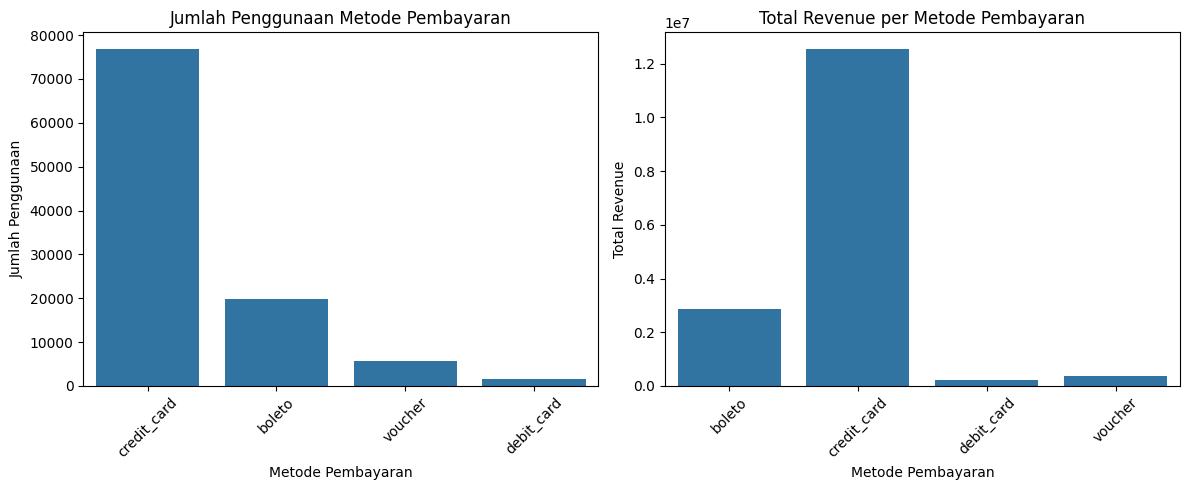

In [49]:
# visualisasi jumlah penggunaan setiap metode pembayaran
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.barplot(data=payment_type_counts, x='payment_type', y='count')
plt.title('Jumlah Penggunaan Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Jumlah Penggunaan')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(data=payment_type_revenue, x='payment_type', y='total_revenue')
plt.title('Total Revenue per Metode Pembayaran')
plt.xlabel('Metode Pembayaran')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Insight:
- Dari hasil diatas terlihat bahwa jumlah penggunaan payment type dan total revenue yang paling banyak ialah credit card.

## Analisis Lanjutan (Opsional)

### Pertanyaan 4: Bagaimana segmentasi pelanggan berdasarkan frekuensi dan total nilai pembelian mereka?

### RFM Analysis

In [50]:
all_df = pd.merge(orders_df_clean, reviews_df, on='order_id')
all_df = pd.merge(all_df, payments_df, on='order_id')
all_df = pd.merge(all_df, customers_df, on='customer_id')

In [51]:
all_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,review_id,...,review_creation_date,review_answer_timestamp,payment_sequential,payment_type,payment_installments,payment_value,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,a54f0611adc9ed256b57ede6b6eb5114,...,2017-10-11 00:00:00,2017-10-12 03:43:48,1,credit_card,1,18.12,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,a54f0611adc9ed256b57ede6b6eb5114,...,2017-10-11 00:00:00,2017-10-12 03:43:48,3,voucher,1,2.00,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,8,a54f0611adc9ed256b57ede6b6eb5114,...,2017-10-11 00:00:00,2017-10-12 03:43:48,2,voucher,1,18.59,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,13,8d5266042046a06655c8db133d120ba5,...,2018-08-08 00:00:00,2018-08-08 18:37:50,1,boleto,1,141.46,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9,e73b67b67587f7644d5bd1a52deb1b01,...,2018-08-18 00:00:00,2018-08-22 19:07:58,1,credit_card,3,179.12,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


In [52]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum", # menghitung jumlah revenue
    "order_purchase_timestamp": "max" # menghitung transaksi terakhir
})

rfm_df.columns = ["customer_unique_id", "frequency", "monetary", "last_order_date"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["last_order_date"] = rfm_df["last_order_date"].dt.date
recent_date = orders_df_clean["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["last_order_date"].apply(lambda x: (recent_date - x).days)

rfm_df.drop(columns="last_order_date", inplace=True)

rfm_df.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114
2,0000f46a3911fa3c0805444483337064,1,86.22,537
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,321
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,288


In [53]:
# Menghitung RFM score
rfm_all = rfm_df.copy()

# Lakukan assign score Recency, Frequency, and Monetary menggunakan quantile
rfm_all['r_score'] = pd.qcut(rfm_all['recency'], 5, labels=[5, 4, 3, 2, 1]) # Lower recency is better
rfm_all['f_score'] = pd.qcut(rfm_all['frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5]) # Higher frequency is better
rfm_all['m_score'] = pd.qcut(rfm_all['monetary'], 5, labels=[1, 2, 3, 4, 5]) # Higher monetary is better

# Menggabungkan RFM scores untuk membuat segmentasi pelanggan
rfm_all['rfm_segment'] = rfm_all['r_score'].astype(str) + rfm_all['f_score'].astype(str) + rfm_all['m_score'].astype(str)

rfm_all.head()

,customer_unique_id,frequency,monetary,recency,r_score,f_score,m_score,rfm_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,111,4,1,4,414
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,114,4,1,1,411
2,0000f46a3911fa3c0805444483337064,1,86.22,537,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,321,2,1,1,211
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,288,2,1,4,214


In [54]:
# Segmentasi pelanggan berdasarkan RFM scores
# Mendefinisikan level RFM dan buat segmentasi pelanggan
def assign_rfm_level(row):
    if row['rfm_segment'] == '555':
        return 'Best Customers'
    elif row['r_score'] >= 4 and row['f_score'] >= 4:
        return 'Loyal Customers'
    elif row['r_score'] >= 4 and row['m_score'] >= 4:
        return 'Big Spenders'
    elif row['f_score'] >= 4 and row['m_score'] >= 4:
        return 'Frequent Buyers'
    elif row['r_score'] >= 4:
        return 'Recent Customers'
    elif row['f_score'] >= 4:
        return 'Frequent Customers'
    elif row['m_score'] >= 4:
        return 'High Value Customers'
    else:
        return 'Others'

rfm_all['rfm_level'] = rfm_all.apply(assign_rfm_level, axis=1)

# Menampilkan total setiap segmen
rfm_all['rfm_level'].value_counts()

,count
rfm_level,
Others,20630
Loyal Customers,13837
Recent Customers,13453
Frequent Customers,13144
High Value Customers,12715
Frequent Buyers,9126
Big Spenders,8844
Best Customers,987


/tmp/ipython-input-2040788933.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm_all, x='rfm_level', order=rfm_all['rfm_level'].value_counts().index, palette='viridis')


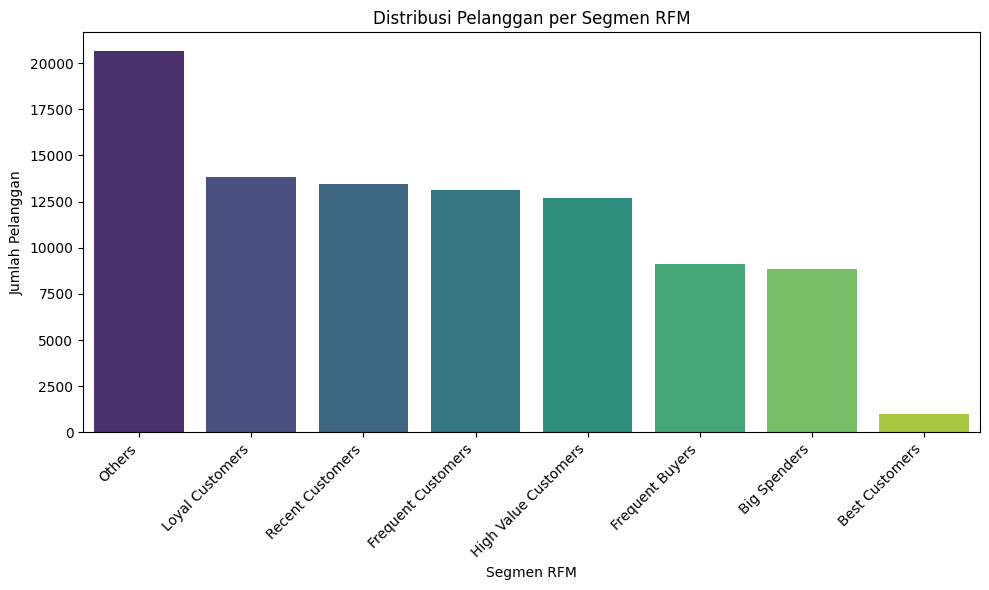

In [55]:
# Visualize distribusi pelanggan untuk setiap segmen RFM
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm_all, x='rfm_level', order=rfm_all['rfm_level'].value_counts().index, palette='viridis')
plt.title('Distribusi Pelanggan per Segmen RFM')
plt.xlabel('Segmen RFM')
plt.ylabel('Jumlah Pelanggan')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [56]:
all_df.to_csv("main_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1: (Hubungan Waktu Pengiriman dengan Review Score): Terdapat hubungan negatif antara lama pengiriman dan rata-rata review score. Pengiriman yang lebih cepat cenderung mendapatkan review score yang lebih tinggi, menunjukkan pentingnya efisiensi pengiriman bagi kepuasan pelanggan.

- Conclution pertanyaan 2: (Asal State Pelanggan dan Revenue Terbanyak): State SP, RJ, MG, RS, dan PR adalah pasar utama dengan jumlah pelanggan dan kontribusi revenue tertinggi. Namun, ada juga banyak state dengan jumlah pelanggan yang sangat sedikit, menunjukkan potensi untuk ekspansi atau kebutuhan strategi penjangkauan yang berbeda.

- Conclution pertanyaan 3: (Metode Pembayaran Paling Sering Digunakan dan Revenue Tertinggi): Credit card adalah metode pembayaran yang paling dominan baik dari segi frekuensi penggunaan maupun total revenue. Ini menunjukkan bahwa credit card adalah metode pembayaran yang paling disukai pelanggan dan paling menguntungkan bagi bisnis.

- Conclution pertanyaan 4: (Segmentasi Pelanggan Berdasarkan Frekuensi dan Total Nilai Pembelian - RFM): Analisis RFM berhasil mengidentifikasi berbagai segmen pelanggan, termasuk pelanggan bernilai tinggi ('Best Customers', 'Loyal Customers', 'Big Spenders', 'Frequent Buyers'). Meskipun segmen 'Others' memiliki jumlah terbesar, fokus pada retensi dan pengembangan segmen bernilai tinggi serta strategi untuk meningkatkan frekuensi dan nilai pembelian di segmen lain akan menjadi kunci pertumbuhan.